## Is it a zucchini?

In [ ]:
from duckduckgo_search import DDGS
from itertools import islice
from fastcore.all import *

def search_images(term, max_images=200): 
    with DDGS() as ddgs:
        ddgs_gen = ddgs.images(term)
        return L(islice(ddgs_gen, max_images)).itemgot('image')

In [ ]:
urls = search_images('zucchini', max_images=1)
urls[0]

'http://www.mggkc.org/wp-content/uploads/2014/06/growing-zucchini-how-to-grow-zucchini-summer-squash2.jpg'

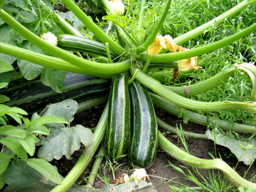

In [ ]:
from fastdownload import download_url
dest = 'zucchini.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

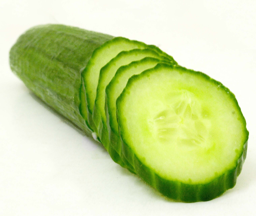

In [ ]:
download_url(search_images('cucumber', max_images=1)[0], 'cucumber.jpg', show_progress=False)
Image.open('cucumber.jpg').to_thumb(256,256)

In [ ]:
searches = 'cucumber','zucchini'
path = Path.home()/'data/00-zucchini'
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

39

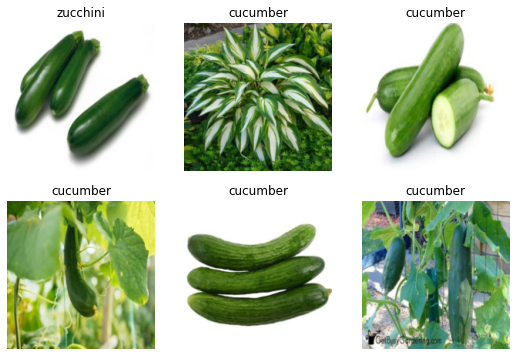

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.045442,0.417399,0.173709,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.548887,0.260985,0.107981,00:03
1,0.352848,0.290127,0.103286,00:03
2,0.250290,0.303124,0.117371,00:03


In [ ]:
is_cucumber,_,probs = learn.predict(PILImage.create('cucumber2.jpg'))
print(f"This is a: {is_cucumber}.")
print(f"Probability it's a cucumber: {probs[0]:.4f}")

This is a: cucumber.
Probability it's a cucumber: 0.9999


In [ ]:
is_cucumber,_,probs = learn.predict(PILImage.create('both.jpg'))
print(f"This is a: {is_cucumber}.")
print(f"Probability it's a cucumber: {probs[0]:.4f}")

This is a: cucumber.
Probability it's a cucumber: 0.9964


In [ ]:
is_cucumber,_,probs = learn.predict(PILImage.create('zucchini2.jpg'))
print(f"This is a: {is_cucumber}.")
print(f"Probability it's a cucumber: {probs[0]:.4f}")

This is a: zucchini.
Probability it's a cucumber: 0.1716
